In [1]:
import tensorflow as tf

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
model = tf.keras.models.load_model("./augmentedmodel.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

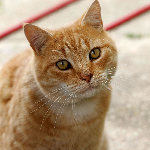

In [26]:
img_path = "./Cat03.jpg"
img      = tf.keras.preprocessing.image.load_img(img_path ,  target_size=(150, 150))
img

In [27]:
img = tf.keras.preprocessing.image.img_to_array(img)
print("Shape of img : ",img.shape)

Shape of img :  (150, 150, 3)


In [28]:
img_ = img[np.newaxis ,]
print("Shape of img : ",img_.shape)
img = img / 255

Shape of img :  (1, 150, 150, 3)


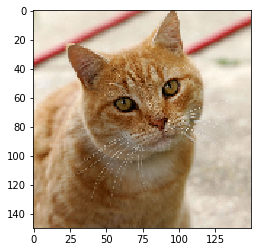

In [29]:
plt.imshow(img)

In [30]:
from tensorflow.keras.models import Model
last_layers = [layer.output for layer in model.layers[:8]]
activation_model = Model(inputs = model.input , outputs = last_layers)

In [45]:
activations = activation_model.predict(img_)

In [39]:
p1 = pred[0]

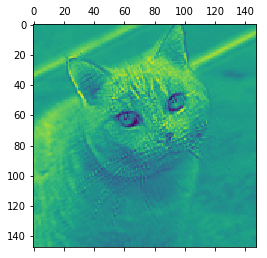

In [41]:
plt.matshow(p1[0, :, :, 4], cmap='viridis')

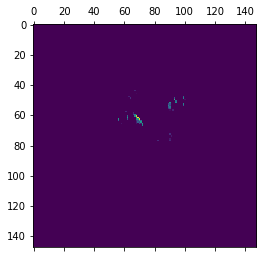

In [42]:
plt.matshow(p1[0, :, :, 7], cmap='viridis')

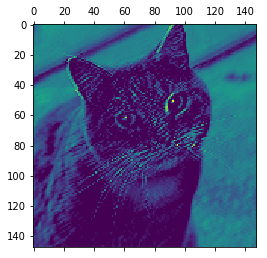

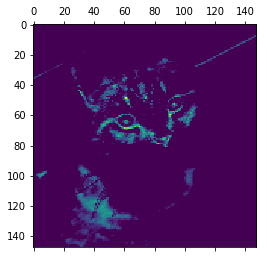

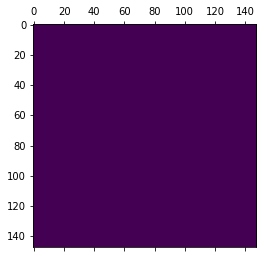

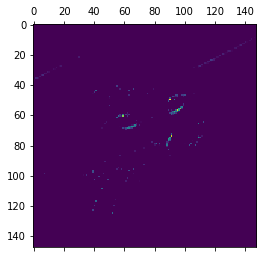

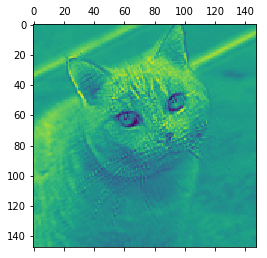

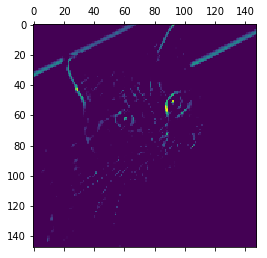

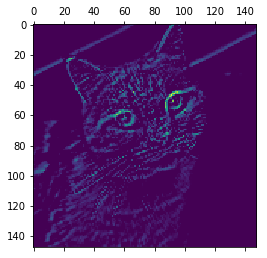

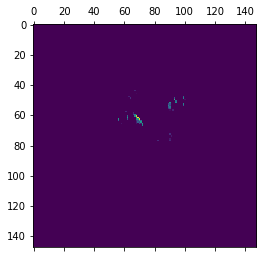

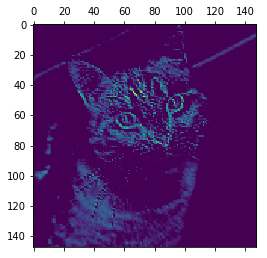

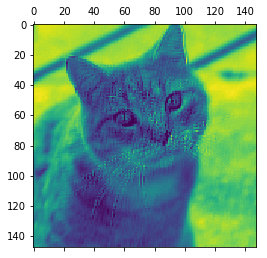

In [43]:
for i in range(10):
    plt.matshow(p1[0, :, :, i], cmap='viridis')
    plt.show()

In [44]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
print(layer_names)

images_per_row = 16

['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'conv2d_3', 'max_pooling2d_3']


C:\Users\ANKIT PODDER\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


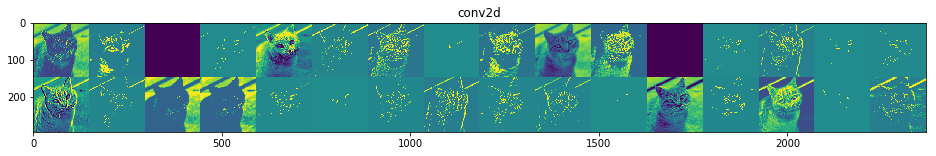

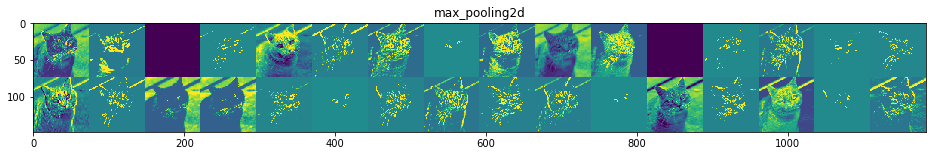

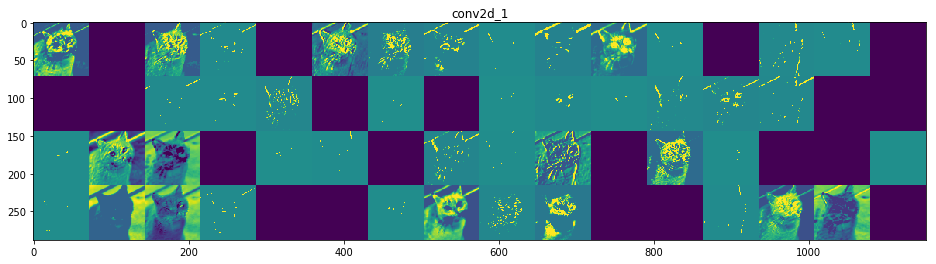

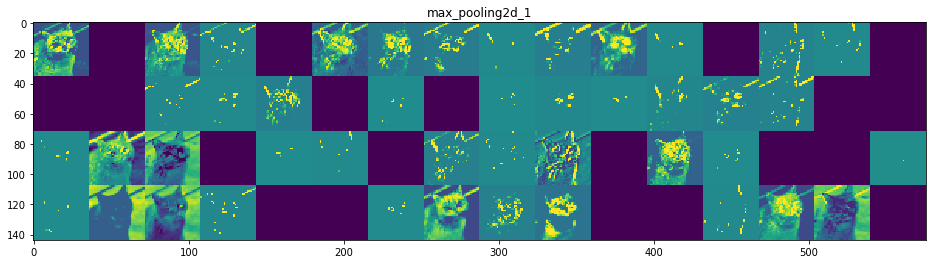

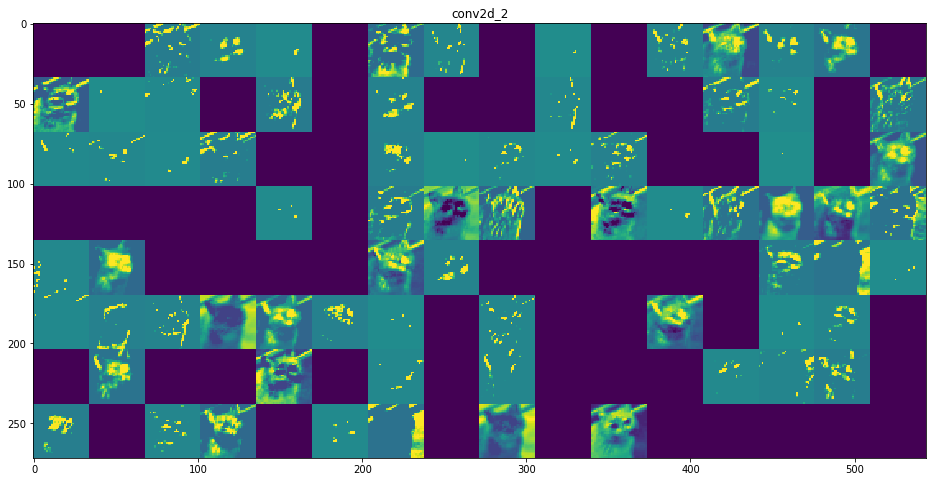

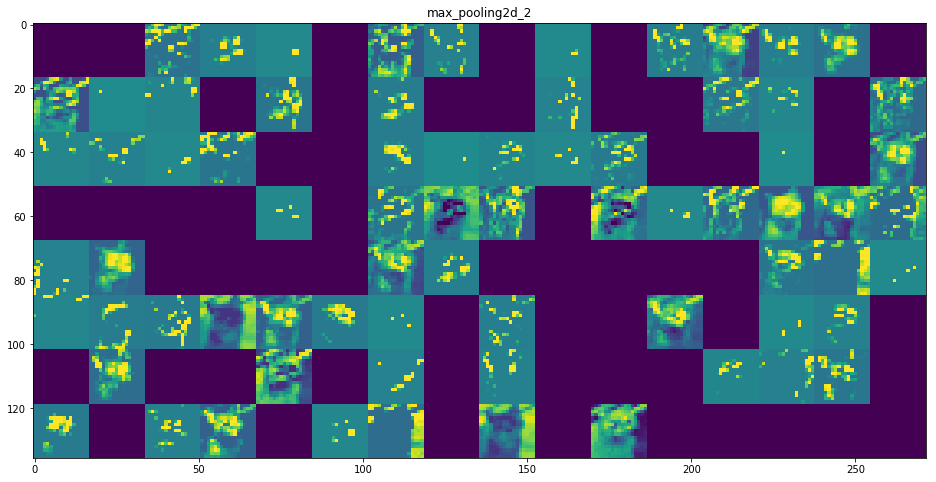

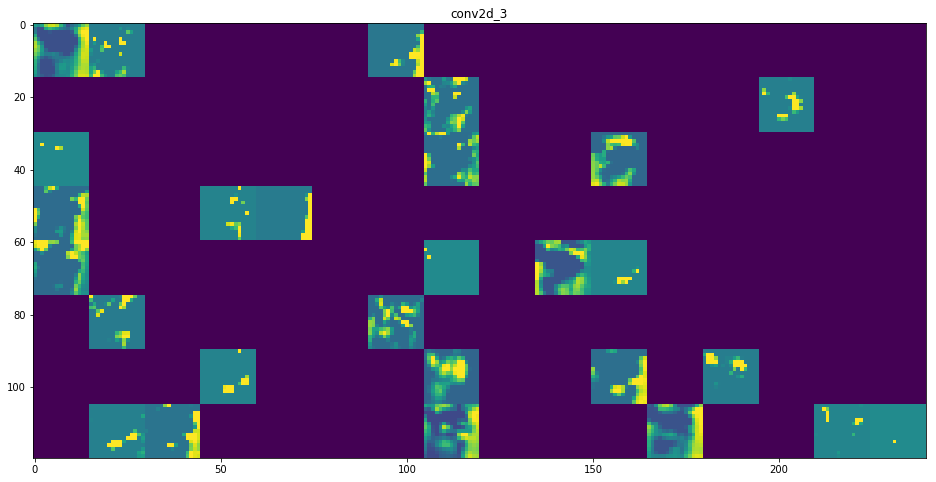

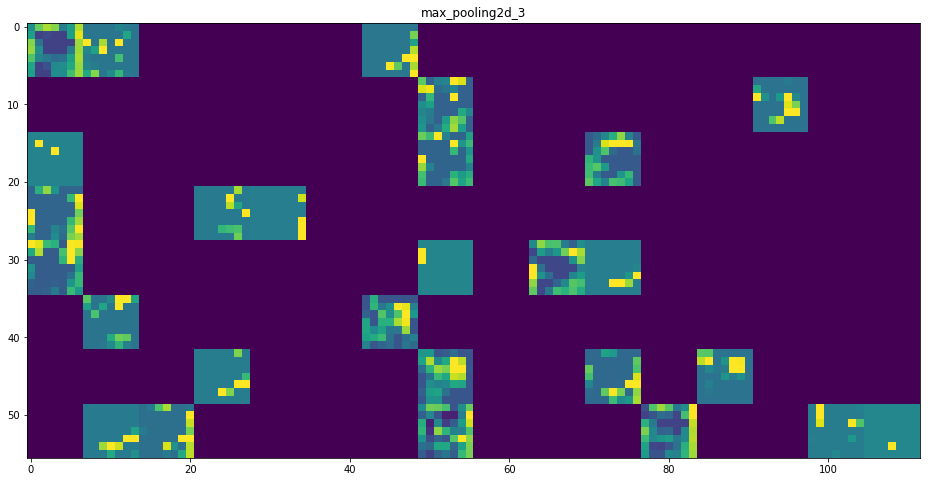

In [56]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
            :, :,
            col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
            row * size : (row + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
    scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [50]:
for act in activations:
    print(act.shape)

(1, 148, 148, 32)
(1, 74, 74, 32)
(1, 72, 72, 64)
(1, 36, 36, 64)
(1, 34, 34, 128)
(1, 17, 17, 128)
(1, 15, 15, 128)
(1, 7, 7, 128)


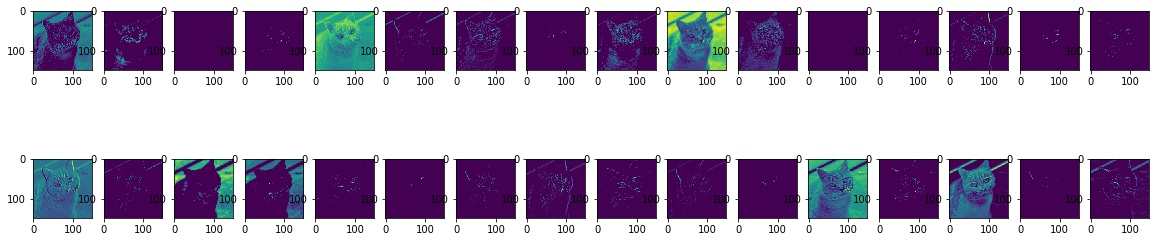

In [55]:
_ , ax = plt.subplots(2 , 16 ,figsize = (20 ,5 ))
for i in range(2):
    for j in range(16):
        ax[i,j].imshow(activations[0][0,:,:,i*16+j])